The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
100%|██████████| 50000/50000 [00:03<00:00, 14585.75it/s]


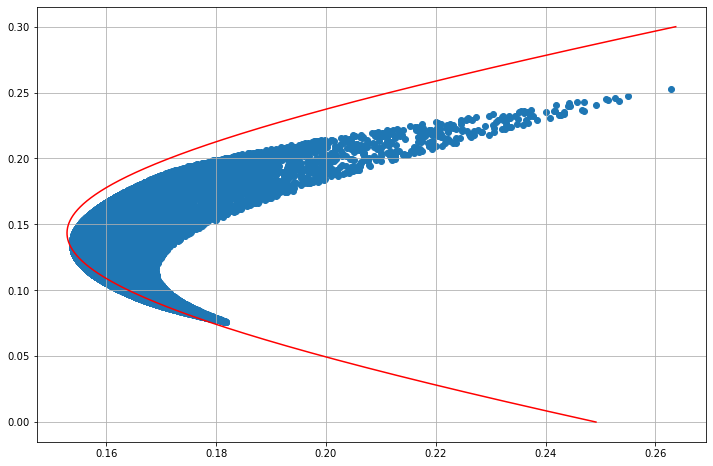

In [94]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from EfficientFrontier_utils import *



class EfficientFrontier():
    def __init__(self, start_date, end_date, *tickers):
        self.n_assets = len(tickers)
        self.assets, self.Rf_mean, self.assets_daily_return = get_assets_data(
            start_date, end_date, tickers)
        self.Sigma = get_covariance_matrix(self.assets_daily_return)
        self.R = np.mean(self.assets_daily_return, axis=0) * 253

        # Solve the efficient frontier
        self.arr_mu, self.arr_volatility, self.arr_w = solve(self.n_assets, self.Sigma, self.R)
        self.MC_axis_X, self.MC_axis_y = MonteCarlo(self.assets)
        
        
    def plot(self):
        plt.figure(figsize=(12,8))
        plt.grid()
        plt.plot(self.arr_volatility, self.arr_mu, color="Red")
        plt.scatter(self.MC_axis_X, self.MC_axis_y)
        plt.show()


if __name__ == "__main__":
    instance = EfficientFrontier(
        "20110101",
        "20150101",
        "AAPL",
        "XOM",
        "PFE",
    )
    instance.plot()

## Existing Problem

The analytical solution did not take into consideration that $w \geq 0$